<a href="https://colab.research.google.com/github/Jackyscy/ChurchMV/blob/master/C1Spread1_Prophet_Outlier_removal_maually_Trend_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install prophet

In [45]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

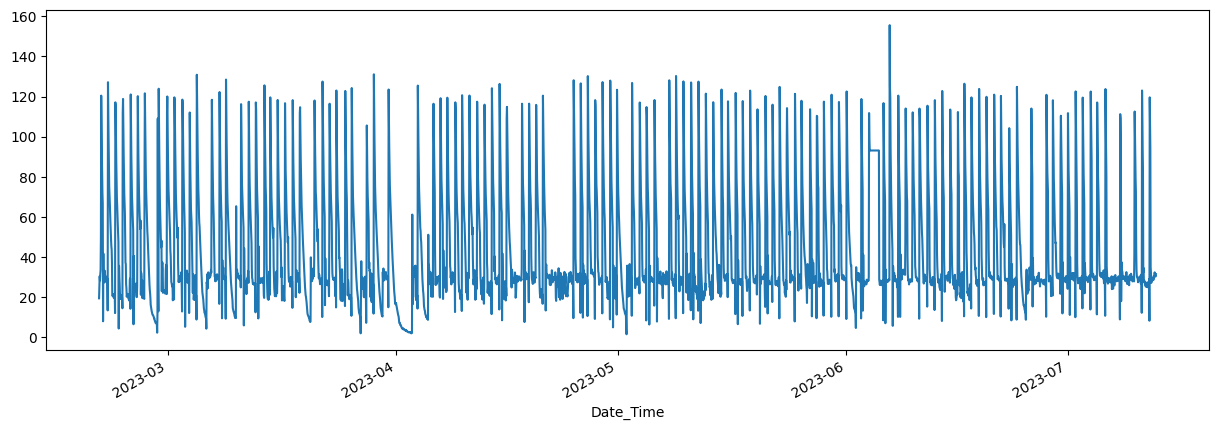

In [46]:
df = pd.read_csv('C1 data from 202302 to 20230712.csv', index_col='Date_Time', parse_dates=True)
df["Combust Monitor Actual Spread 1"].plot(figsize=(15, 5));

In [47]:
df_p = df[df['GT Gross MW'] > 190][['Combust Monitor Actual Spread 1']].copy()
df_p['Date_Time'] = df_p.index

In [48]:
df_p.head()

,Combust Monitor Actual Spread 1,Date_Time
Date_Time,,
2023-02-19 19:10:14,30.381201,2023-02-19 19:10:14
2023-02-19 20:10:14,28.261114,2023-02-19 20:10:14
2023-02-19 21:10:14,31.508333,2023-02-19 21:10:14
2023-02-19 22:10:14,33.344593,2023-02-19 22:10:14
2023-02-20 09:10:14,29.889938,2023-02-20 09:10:14


In [49]:
df_p.columns = ['y', 'ds']
df_p.head()

,y,ds
Date_Time,,
2023-02-19 19:10:14,30.381201,2023-02-19 19:10:14
2023-02-19 20:10:14,28.261114,2023-02-19 20:10:14
2023-02-19 21:10:14,31.508333,2023-02-19 21:10:14
2023-02-19 22:10:14,33.344593,2023-02-19 22:10:14
2023-02-20 09:10:14,29.889938,2023-02-20 09:10:14


In [50]:
logdf = df_p.copy()
logdf['y'] = np.log(logdf['y'])
logdf.head()

,y,ds
Date_Time,,
2023-02-19 19:10:14,3.413824,2023-02-19 19:10:14
2023-02-19 20:10:14,3.341487,2023-02-19 20:10:14
2023-02-19 21:10:14,3.450252,2023-02-19 21:10:14
2023-02-19 22:10:14,3.506896,2023-02-19 22:10:14
2023-02-20 09:10:14,3.397522,2023-02-20 09:10:14


In [76]:
split_date = '2023-09-15'
train = logdf.loc[logdf.index <= split_date].copy()
test = logdf.loc[logdf.index > split_date].copy()

In [77]:
m3 = Prophet(changepoint_range=1)

In [78]:
m3.fit(logdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/z_8uu2h2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/joj8dw8x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22673', 'data', 'file=/tmp/tmpg_dlh9xh/z_8uu2h2.json', 'init=/tmp/tmpg_dlh9xh/joj8dw8x.json', 'output', 'file=/tmp/tmpg_dlh9xh/prophet_model20049pa5/prophet_model-20231026142825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [79]:
future = m3.make_future_dataframe(periods=300, freq = 'H')

In [80]:
forecast = m3.predict(future)

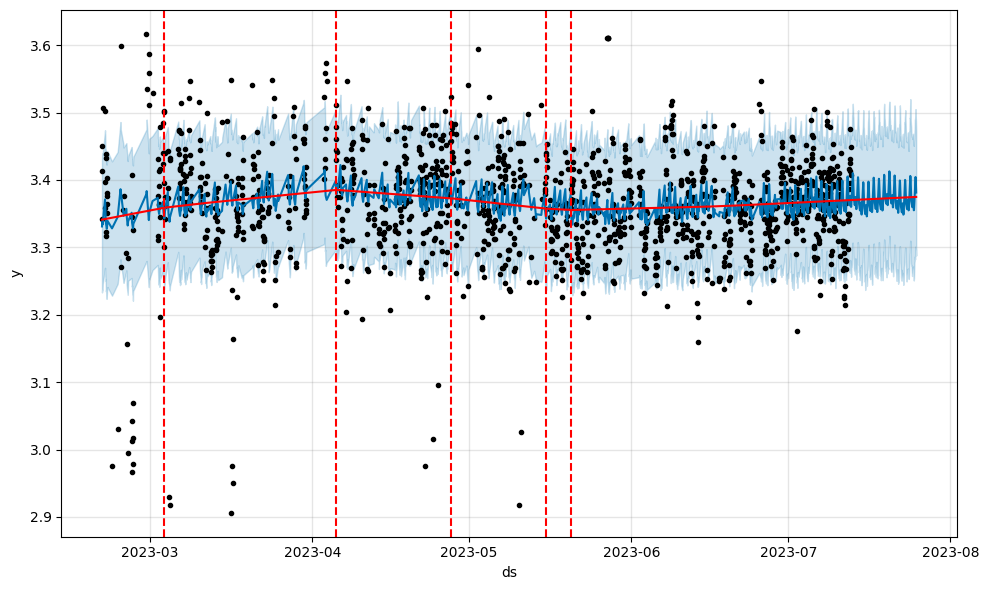

In [81]:
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

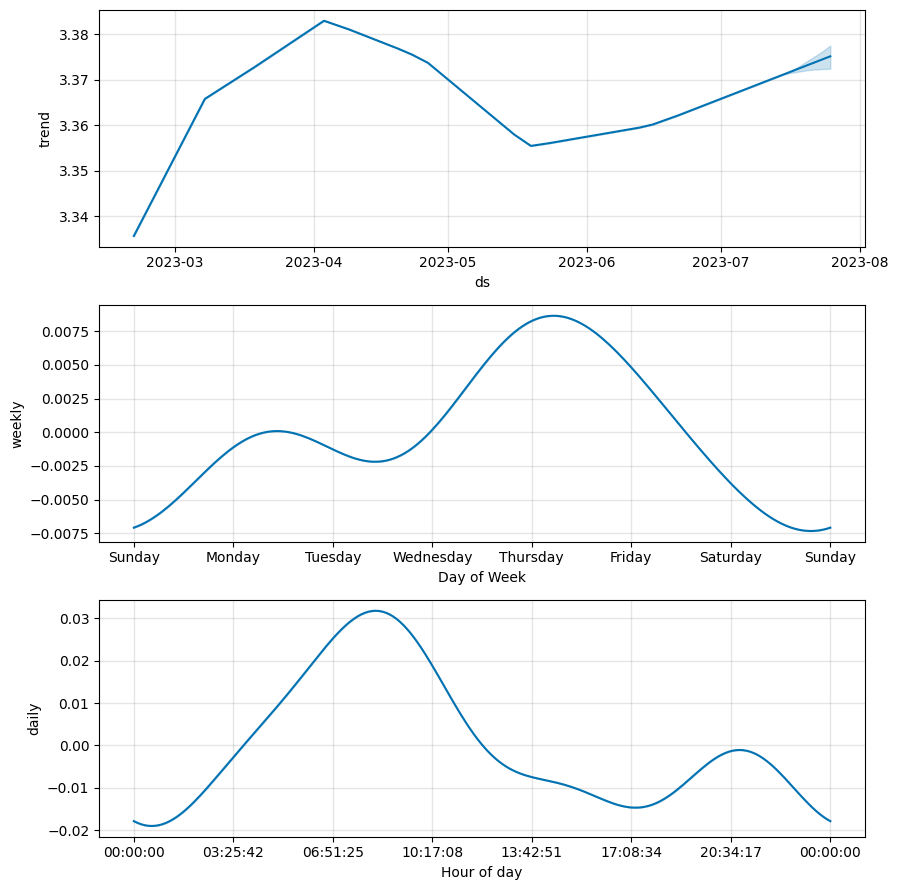

In [57]:
m3.plot_components(forecast);

In [58]:
from prophet.diagnostics import cross_validation

In [59]:
df_cv = cross_validation(
    m3,
    initial='300 hours',
    period='12 hours',
    horizon='24 hours')

INFO:prophet:Making 222 forecasts with cutoffs between 2023-03-05 20:10:00 and 2023-07-11 23:10:00


  0%|          | 0/222 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/77y9uzax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/s9vm9ukk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32824', 'data', 'file=/tmp/tmpg_dlh9xh/77y9uzax.json', 'init=/tmp/tmpg_dlh9xh/s9vm9ukk.json', 'output', 'file=/tmp/tmpg_dlh9xh/prophet_modelivwwbt7d/prophet_model-20231026142212.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:22:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/z0pqk3tt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/gk52cmcy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [60]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-03-06 09:10:00,3.855493,3.702818,4.011653,3.446286,2023-03-05 20:10:00
1,2023-03-06 11:10:00,3.801429,3.644582,3.938777,3.438979,2023-03-05 20:10:00
2,2023-03-06 12:10:00,3.776811,3.624695,3.921966,3.474413,2023-03-05 20:10:00
3,2023-03-06 13:10:00,3.728274,3.583295,3.874221,3.472895,2023-03-05 20:10:00
4,2023-03-06 14:10:00,3.680284,3.526735,3.832657,3.373839,2023-03-05 20:10:00
...,...,...,...,...,...,...
2578,2023-07-12 19:10:00,3.366738,3.269543,3.463945,3.474987,2023-07-11 23:10:00
2579,2023-07-12 20:10:00,3.372102,3.270679,3.471883,3.430711,2023-07-11 23:10:00
2580,2023-07-12 21:10:00,3.373255,3.273637,3.473654,3.425818,2023-07-11 23:10:00
2581,2023-07-12 22:10:00,3.369040,3.265945,3.467420,3.407810,2023-07-11 23:10:00


In [61]:
from prophet.diagnostics import performance_metrics

In [62]:
pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 03:00:00,0.007910,0.088939,0.063324,0.018928,0.013938,0.018811,0.882445
1,0 days 03:00:14,0.007777,0.088188,0.062645,0.018726,0.013628,0.018613,0.883917
2,0 days 03:59:46,0.007799,0.088311,0.062900,0.018778,0.013487,0.018680,0.871014
3,0 days 04:00:00,0.009371,0.096803,0.066811,0.020076,0.013487,0.019909,0.846202
4,0 days 04:00:14,0.009341,0.096649,0.066812,0.020081,0.013799,0.019912,0.847235
...,...,...,...,...,...,...,...,...
59,0 days 22:59:46,0.007382,0.085920,0.065370,0.019425,0.015744,0.019385,0.846899
60,0 days 23:00:00,0.007655,0.087495,0.064679,0.019267,0.014538,0.019199,0.847868
61,0 days 23:00:14,0.007496,0.086582,0.063984,0.019056,0.014711,0.018993,0.848407
62,0 days 23:59:46,0.007552,0.086900,0.063650,0.018962,0.014706,0.018891,0.844961


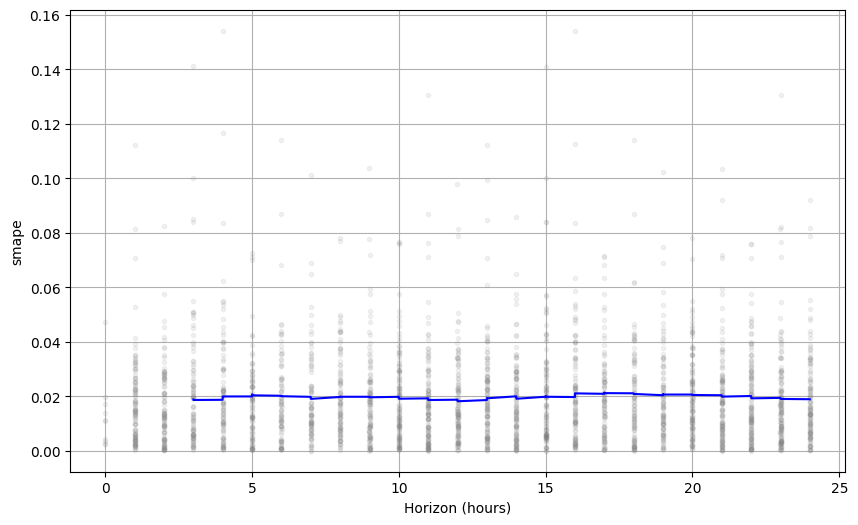

In [63]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

In [64]:
pm['smape'].mean()

0.019746482116621084

In [65]:
forecast['fact'] = logdf['y'].reset_index(drop = True)

In [66]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [67]:
df_cv.head(30)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-03-06 09:10:00,3.855493,3.702818,4.011653,3.446286,2023-03-05 20:10:00
1,2023-03-06 11:10:00,3.801429,3.644582,3.938777,3.438979,2023-03-05 20:10:00
2,2023-03-06 12:10:00,3.776811,3.624695,3.921966,3.474413,2023-03-05 20:10:00
3,2023-03-06 13:10:00,3.728274,3.583295,3.874221,3.472895,2023-03-05 20:10:00
4,2023-03-06 14:10:00,3.680284,3.526735,3.832657,3.373839,2023-03-05 20:10:00
5,2023-03-06 15:10:00,3.659804,3.515033,3.806093,3.416744,2023-03-05 20:10:00
6,2023-03-06 16:10:00,3.663785,3.518035,3.826978,3.388594,2023-03-05 20:10:00
7,2023-03-06 17:10:00,3.667903,3.518375,3.808702,3.414082,2023-03-05 20:10:00
8,2023-03-06 18:10:00,3.662916,3.509003,3.820038,3.395435,2023-03-05 20:10:00
9,2023-03-06 19:10:00,3.669377,3.520791,3.815970,3.417330,2023-03-05 20:10:00
